In [138]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn.objects as so

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import numpy as np
import pandas as pd


In [139]:
# confusion matrices before and after quantization
conf_matrix_before_q = np.array(
        [[276, 2, 1, 0, 0, 2, 2, 17],
        [3, 251, 30, 1, 0, 0, 0, 15],
        [1, 24, 263, 0, 1, 3, 0, 8],
        [1, 2, 1, 822, 72, 13, 11, 20],
        [5, 0, 0, 40, 843, 15, 20, 46],
        [6, 1, 13, 4, 5, 803, 25, 46],
        [0, 0, 0, 2, 26, 36, 887, 27],
        [14, 20, 13, 40, 50, 131, 40, 631]])

conf_matrix_after_q = np.array(
        [[276, 2, 2, 0, 1, 3, 2, 14],
        [2, 251, 29, 1, 0, 0, 0, 17],
        [2, 27, 259, 0, 1, 3, 0, 8],
        [2, 2, 0, 821, 69, 15, 11, 22],
        [5, 0, 0, 44, 836, 15, 24, 45],
        [4, 1, 13, 4, 5, 808, 24, 44],
        [0, 0, 0, 2, 25, 34, 895, 22],
        [13, 20, 13, 38, 48, 132, 46, 629]])

In [140]:
total_values = np.sum(conf_matrix_before_q, axis=1)

In [141]:
# compute metrics before quant.
precision_before = np.diag(conf_matrix_before_q) / np.sum(conf_matrix_before_q, axis=0)
recall_before = np.diag(conf_matrix_before_q) / np.sum(conf_matrix_before_q, axis=1)
f1_score_before = 2 * (precision_before * recall_before) / (precision_before + recall_before)

avg_precision_before = np.average(precision_before, weights=total_values)
avg_recall_before = np.average(recall_before, weights=total_values)
avg_f1_score_before = np.average(f1_score_before, weights=total_values)

print(f"avg precision before: {100*avg_precision_before:.2f}%,\navg recall before: {100*avg_recall_before:.2f}%,\navg f1 score before: {100*avg_f1_score_before:.2f}%")

avg precision before: 84.77%,
avg recall before: 84.82%,
avg f1 score before: 84.68%


In [142]:
# compute metrics after quant.
precision_after = np.diag(conf_matrix_after_q) / np.sum(conf_matrix_after_q, axis=0)
recall_after = np.diag(conf_matrix_after_q) / np.sum(conf_matrix_after_q, axis=1)
f1_score_after = 2 * (precision_after * recall_after) / (precision_after + recall_after)

avg_precision_after = np.average(precision_after, weights=total_values)
avg_recall_after = np.average(recall_after, weights=total_values)
avg_f1_score_after = np.average(f1_score_after, weights=total_values)

print(f"avg precision after: {100*avg_precision_after:.2f}%,\navg recall after: {100*avg_recall_after:.2f}%,\navg f1 score after: {100*avg_f1_score_after:.2f}%")

avg precision after: 84.75%,
avg recall after: 84.80%,
avg f1 score after: 84.65%


In [143]:
# normalize matrices
conf_matrix_before_q = preprocessing.normalize(conf_matrix_before_q, axis=1, norm='l1')
conf_matrix_after_q = preprocessing.normalize(conf_matrix_after_q, axis=1, norm='l1')

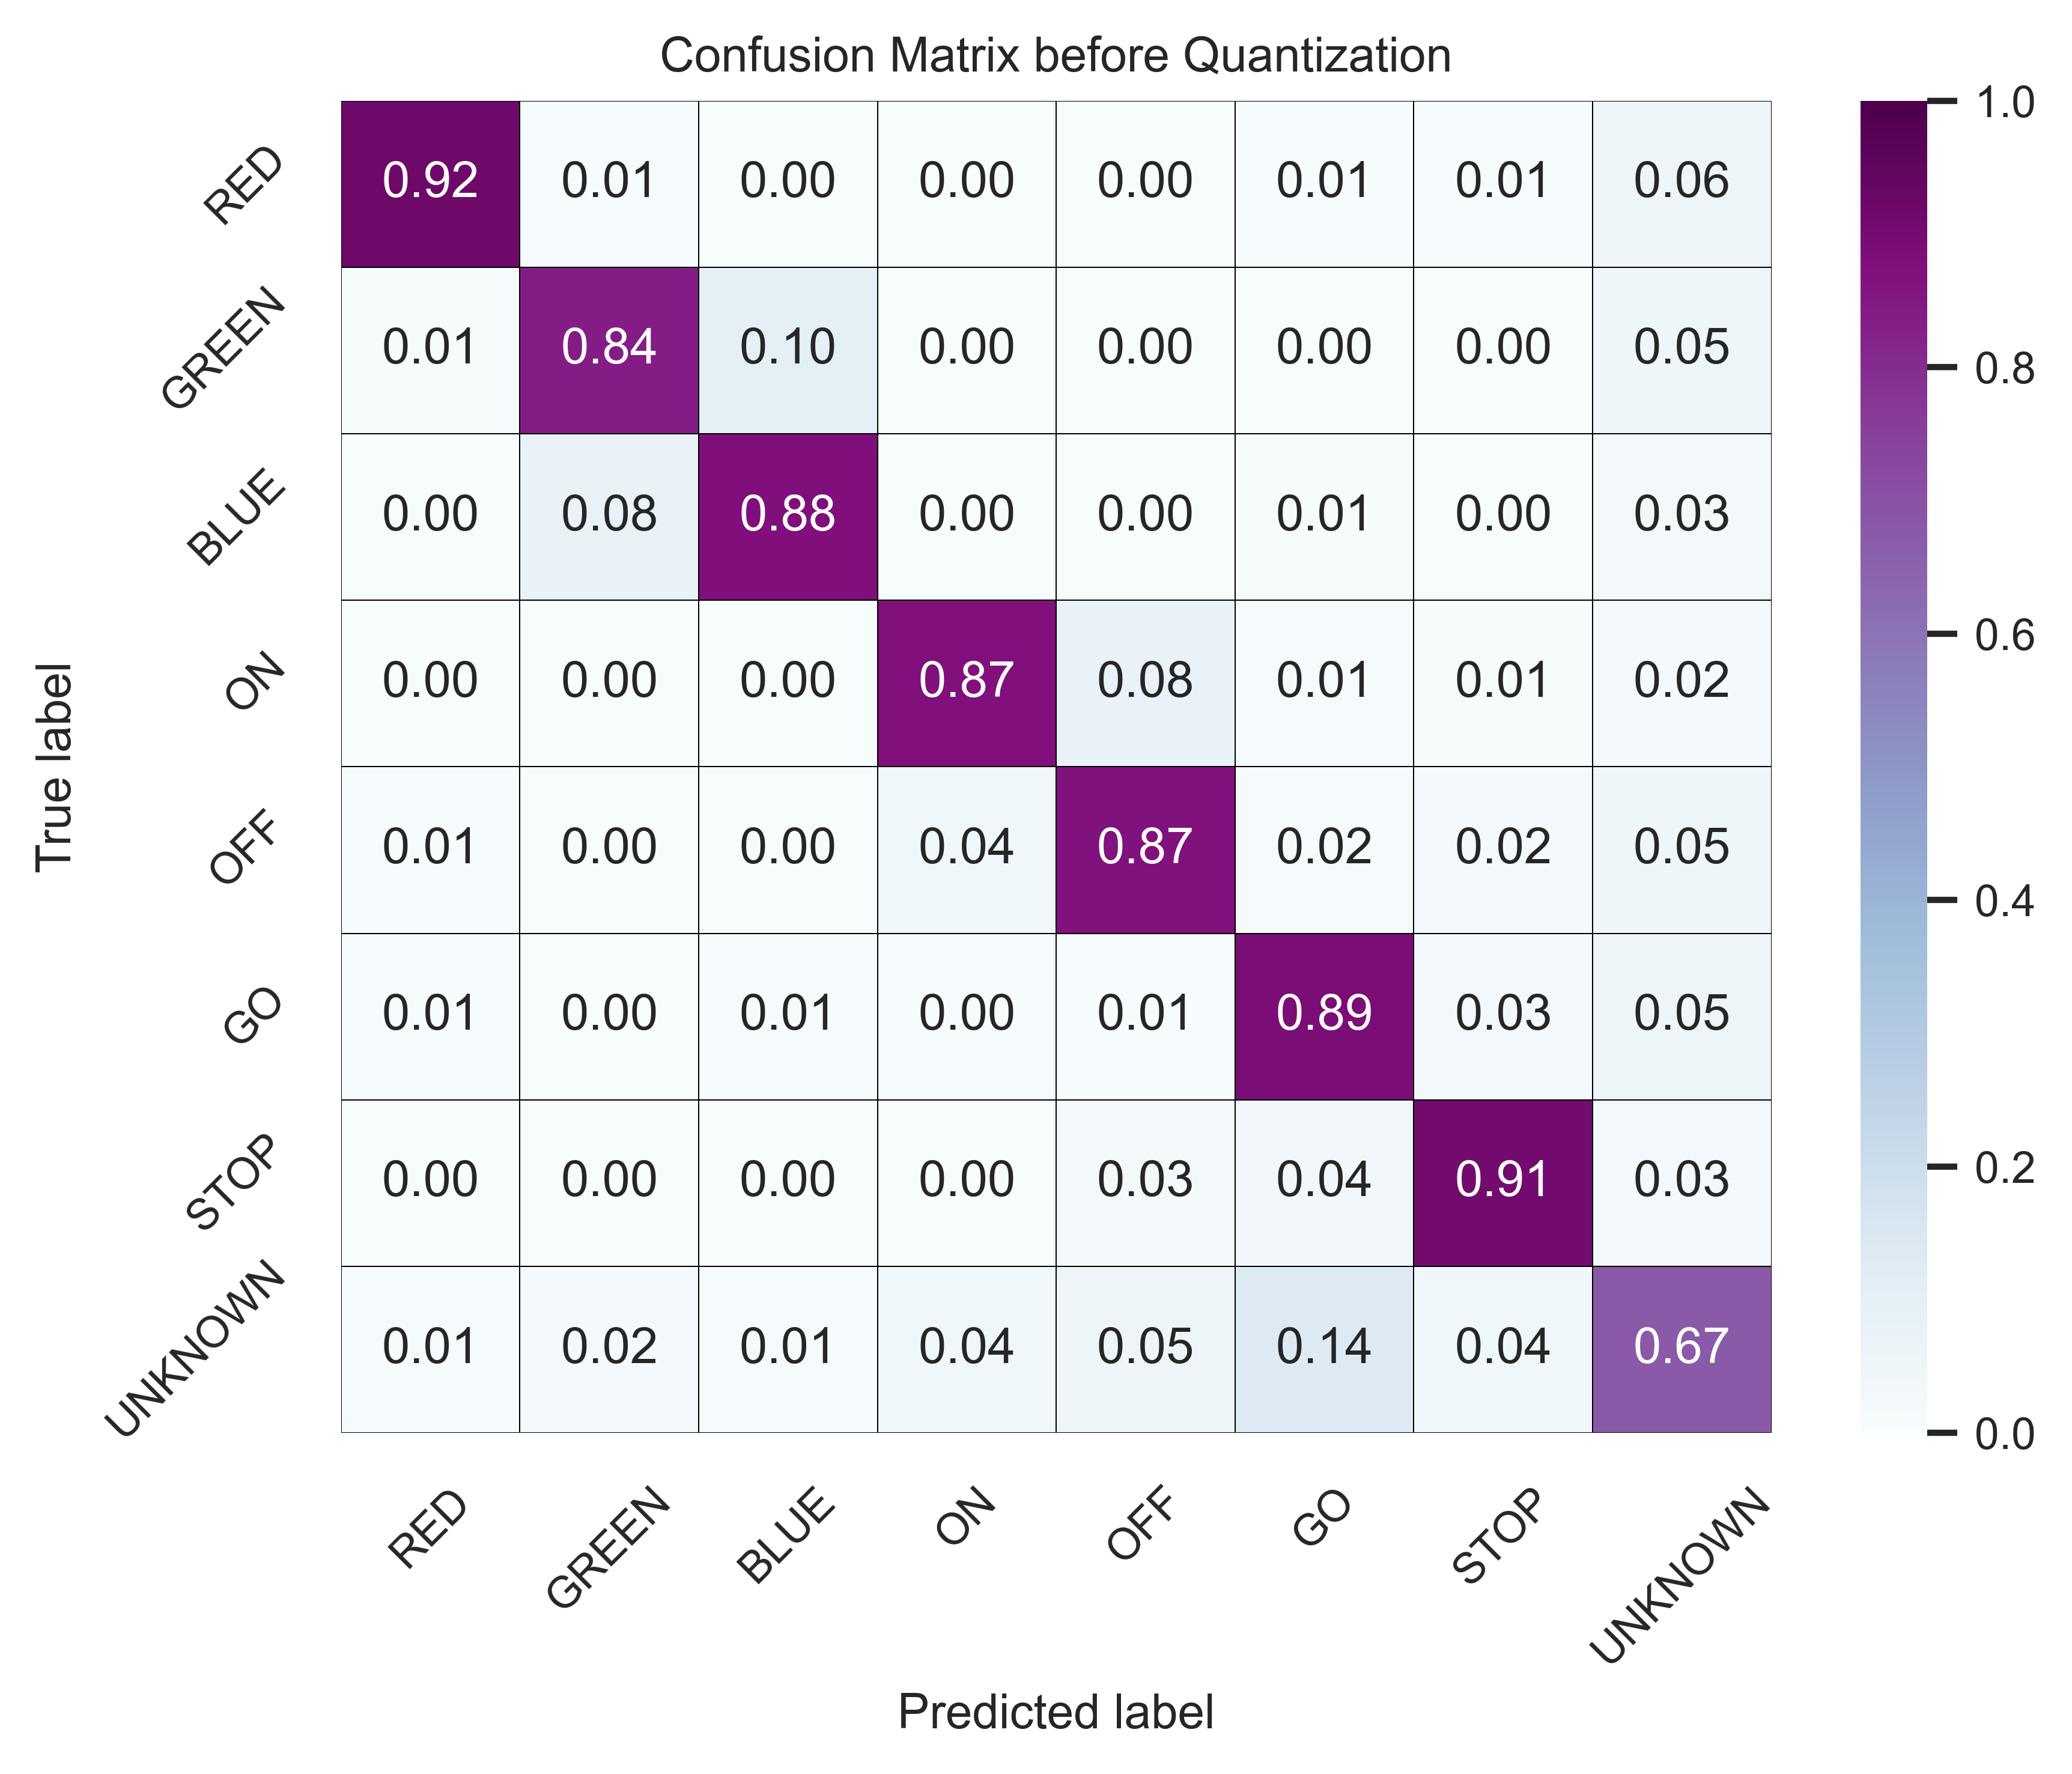

In [157]:
# plot matrix before quant.
df_cm = pd.DataFrame(conf_matrix_before_q, ['RED', 'GREEN', 'BLUE', 'ON', 'OFF', 'GO', 'STOP', 'UNKNOWN'], ['RED', 'GREEN', 'BLUE', 'ON', 'OFF', 'GO', 'STOP', 'UNKNOWN'])

sn.set(font_scale=0.8)
sn.heatmap(df_cm, cmap='BuPu', annot=True, vmax=1, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01, linecolor='black')

plt.rcParams['figure.dpi'] = 600
plt.xticks(rotation=45)
plt.xlabel("Predicted label")
plt.yticks(rotation=45)
plt.ylabel("True label")
plt.title("Confusion Matrix before Quantization")
plt.show()

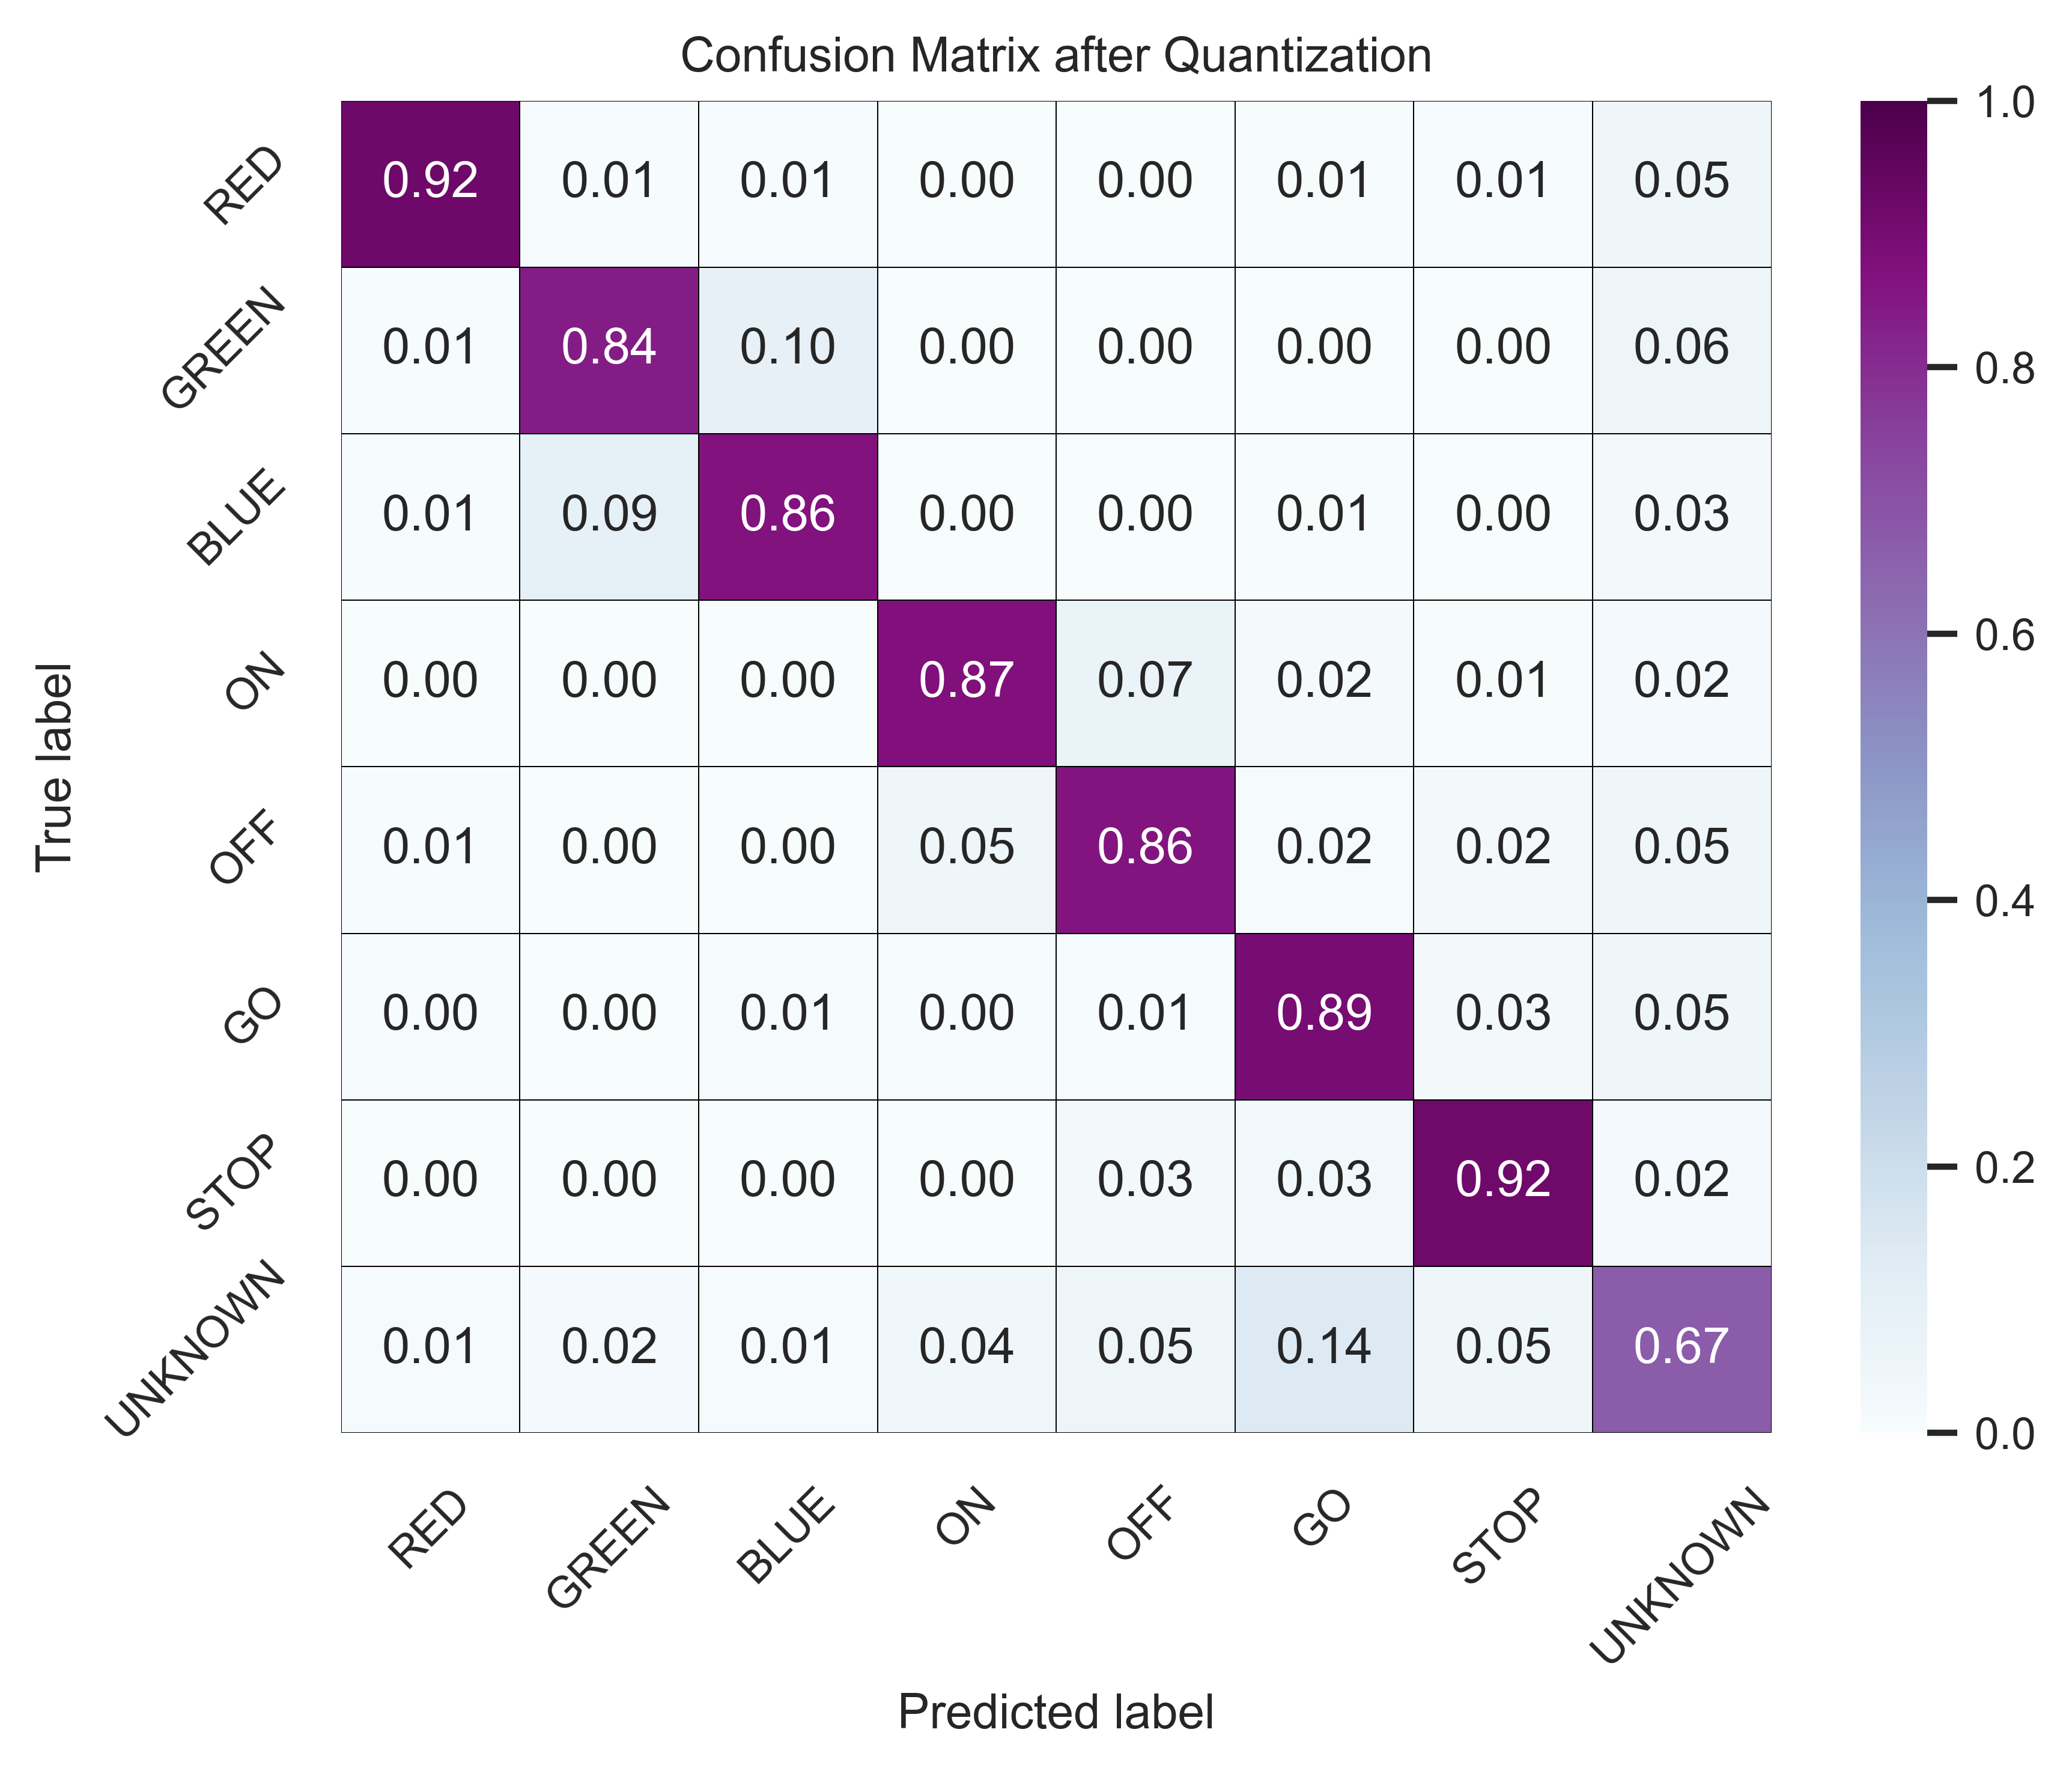

In [158]:
# plot matrix after quant.
df_cm = pd.DataFrame(conf_matrix_after_q, ['RED', 'GREEN', 'BLUE', 'ON', 'OFF', 'GO', 'STOP', 'UNKNOWN'], ['RED', 'GREEN', 'BLUE', 'ON', 'OFF', 'GO', 'STOP', 'UNKNOWN'])

sn.set(font_scale=0.8)
sn.heatmap(df_cm, cmap='BuPu', annot=True, vmax=1, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01, linecolor='black')

plt.rcParams['figure.dpi'] = 600
plt.xticks(rotation=45)
plt.xlabel("Predicted label")
plt.yticks(rotation=45)
plt.ylabel("True label")
plt.title("Confusion Matrix after Quantization")
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13712\1941473561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.violinplot(data=data, x="Age", y="Gender", inner=None, palette='BuPu')


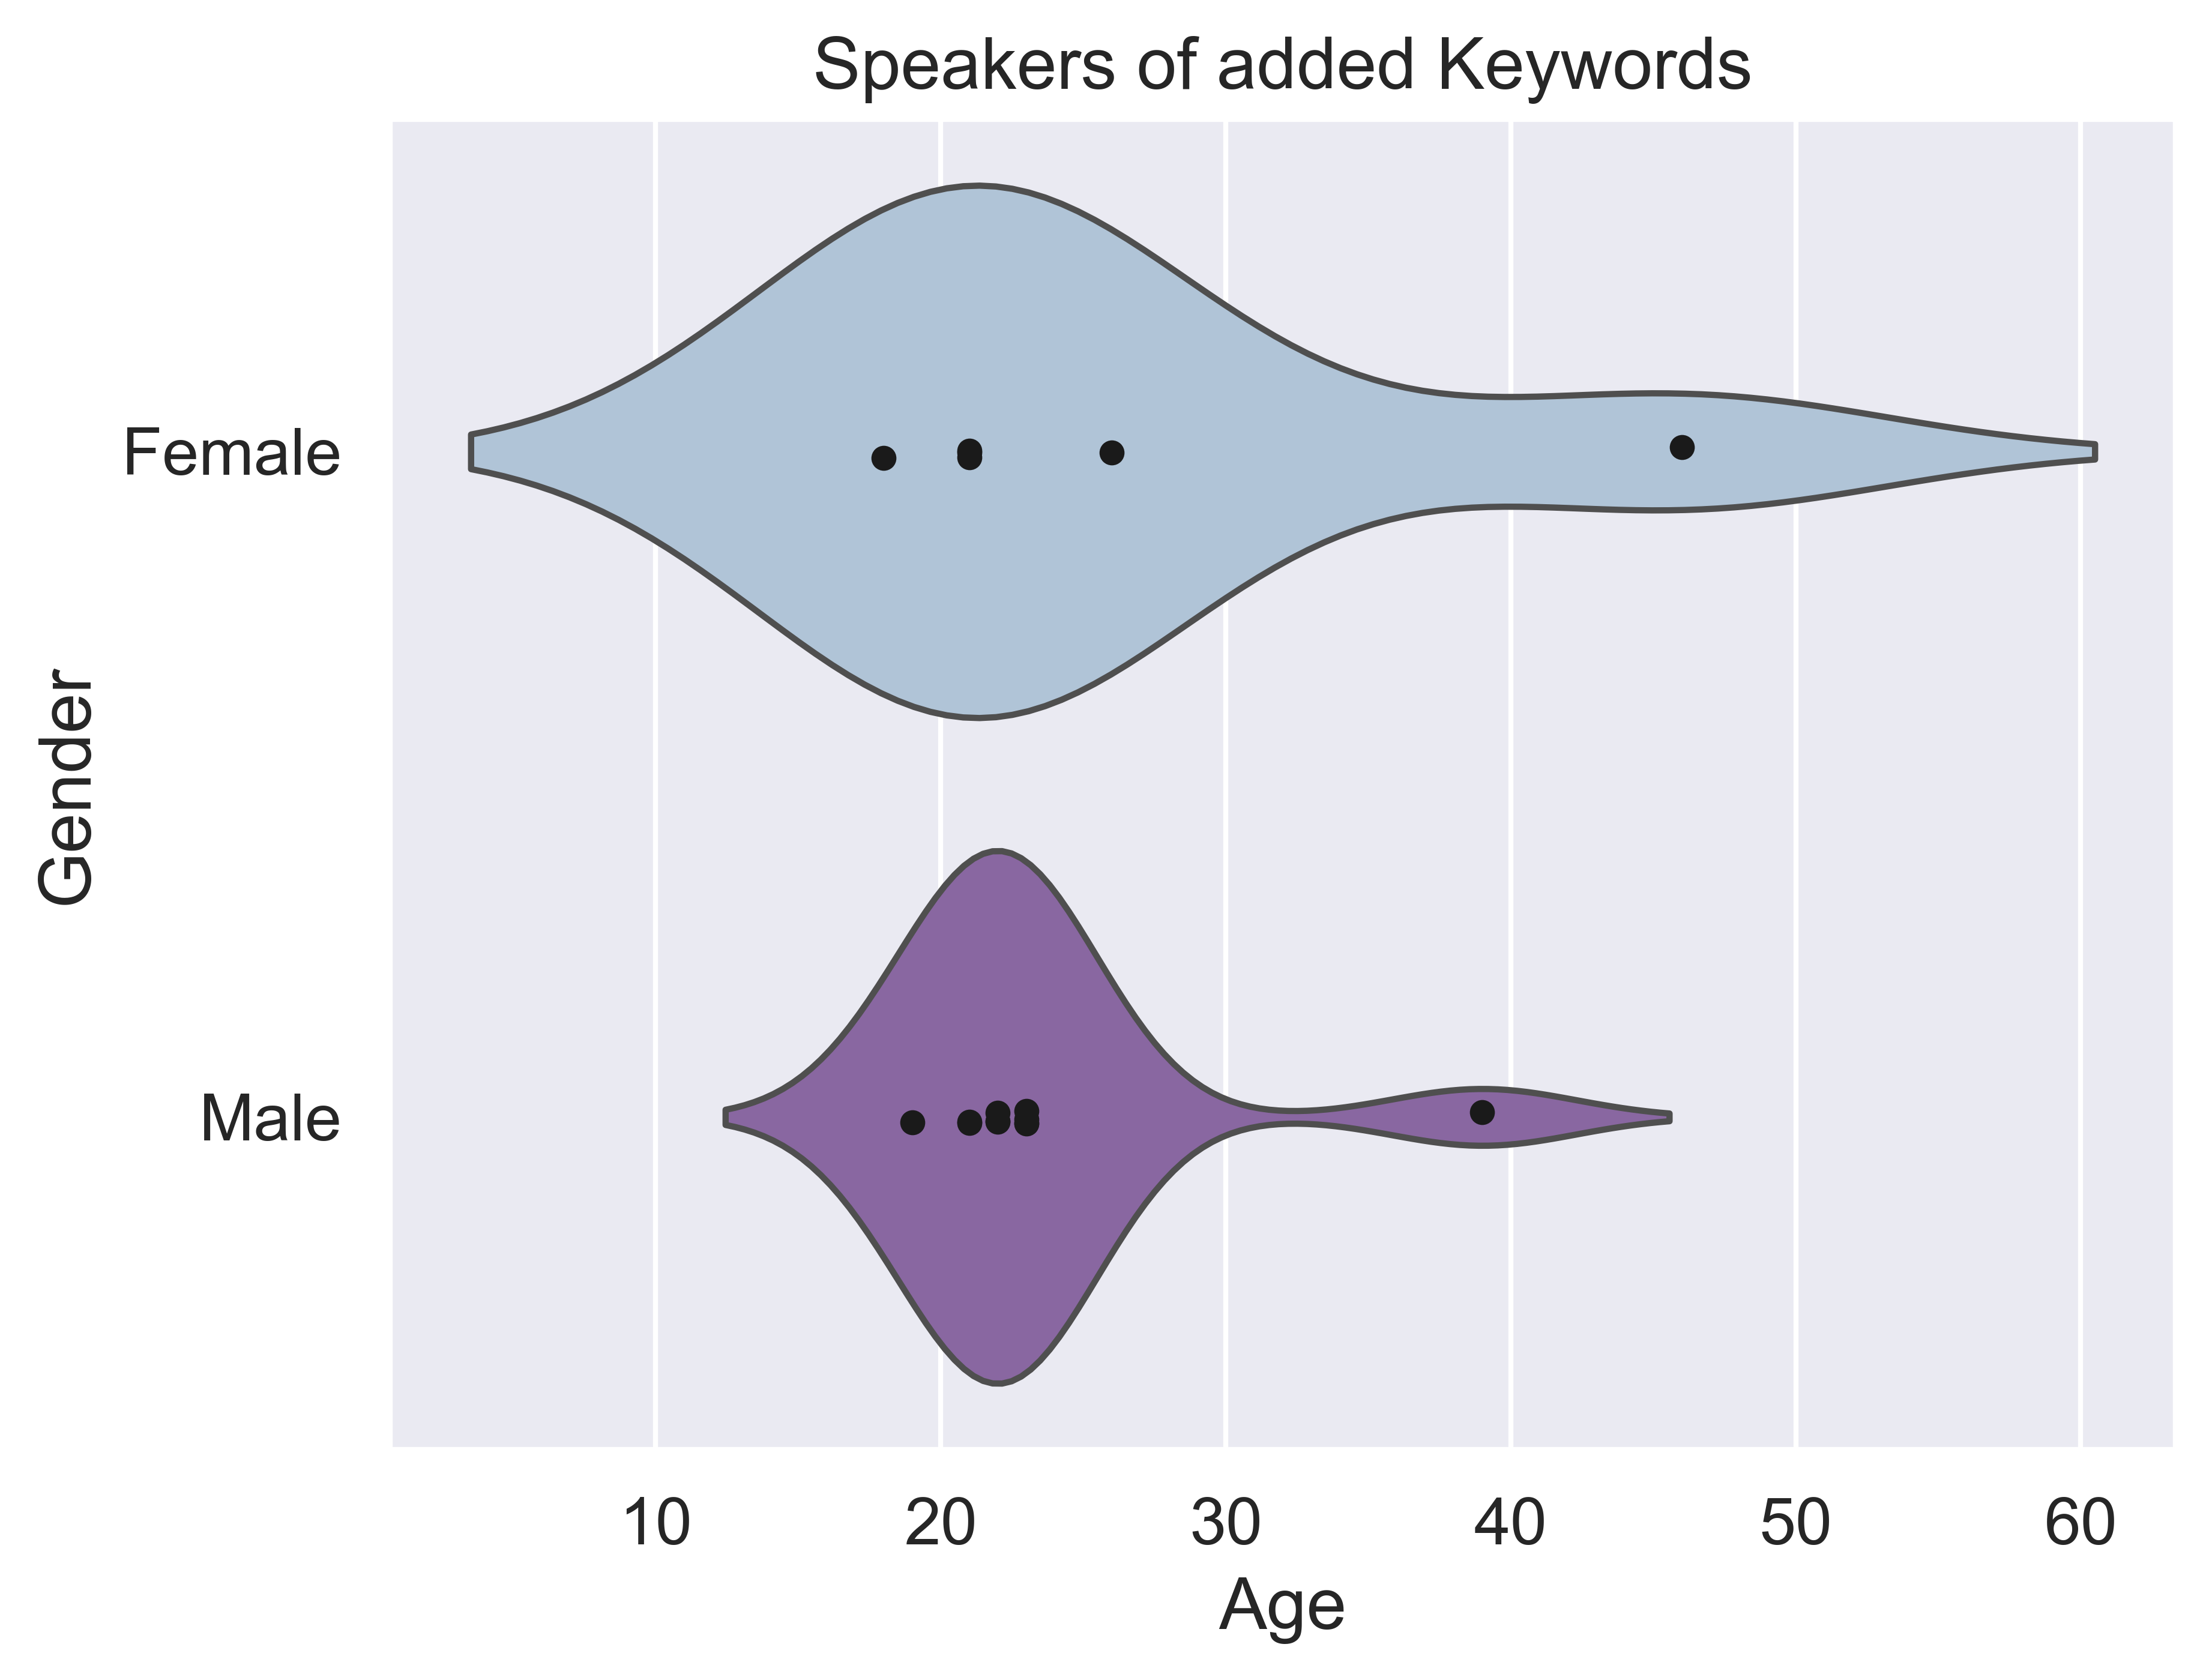

In [152]:
# dataset metrics
data = {
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
    'Age': [26, 23, 22, 21, 22, 22, 46, 23, 21, 23, 21, 23, 39, 21, 18, 19, 21]
}
sn.set(font_scale=1.2)


sn.violinplot(data=data, x="Age", y="Gender", inner=None, palette='BuPu')
sn.stripplot(data=data, x="Age", y="Gender", jitter=0.01, color='k')

plt.rcParams['figure.dpi'] = 600
plt.title("Speakers of added Keywords")
plt.show()

In [147]:
output_log = r'.\90ep.log'
with open(output_log, 'r') as f:
    log = f.readlines()
    
log = [line.strip() for line in log]
NR_OF_EPOCHS = 90

validate_indices = [index for index, line in enumerate(log) if 'validate' in line]
testing_index = [index for index, line in enumerate(log) if 'test' in line][-1]

log_end_of_training = [log[index-1] for index in validate_indices]
training_loss = [float(epoch_line.split()[9]) for epoch_line in log_end_of_training]
training_accuracy = [float(epoch_line.split()[11]) for epoch_line in log_end_of_training]

log_end_of_validate = [log[index+3] for index in validate_indices]
validation_loss = [float(epoch_line.split()[5]) for epoch_line in log_end_of_validate]
validation_accuracy = [float(epoch_line.split()[7]) for epoch_line in log_end_of_validate]

test_loss = float(log[testing_index+3].split()[5])
test_accuracy = float(log[testing_index+3].split()[7])

print(f"test accuracy: {test_accuracy}")

test accuracy: 84.816196


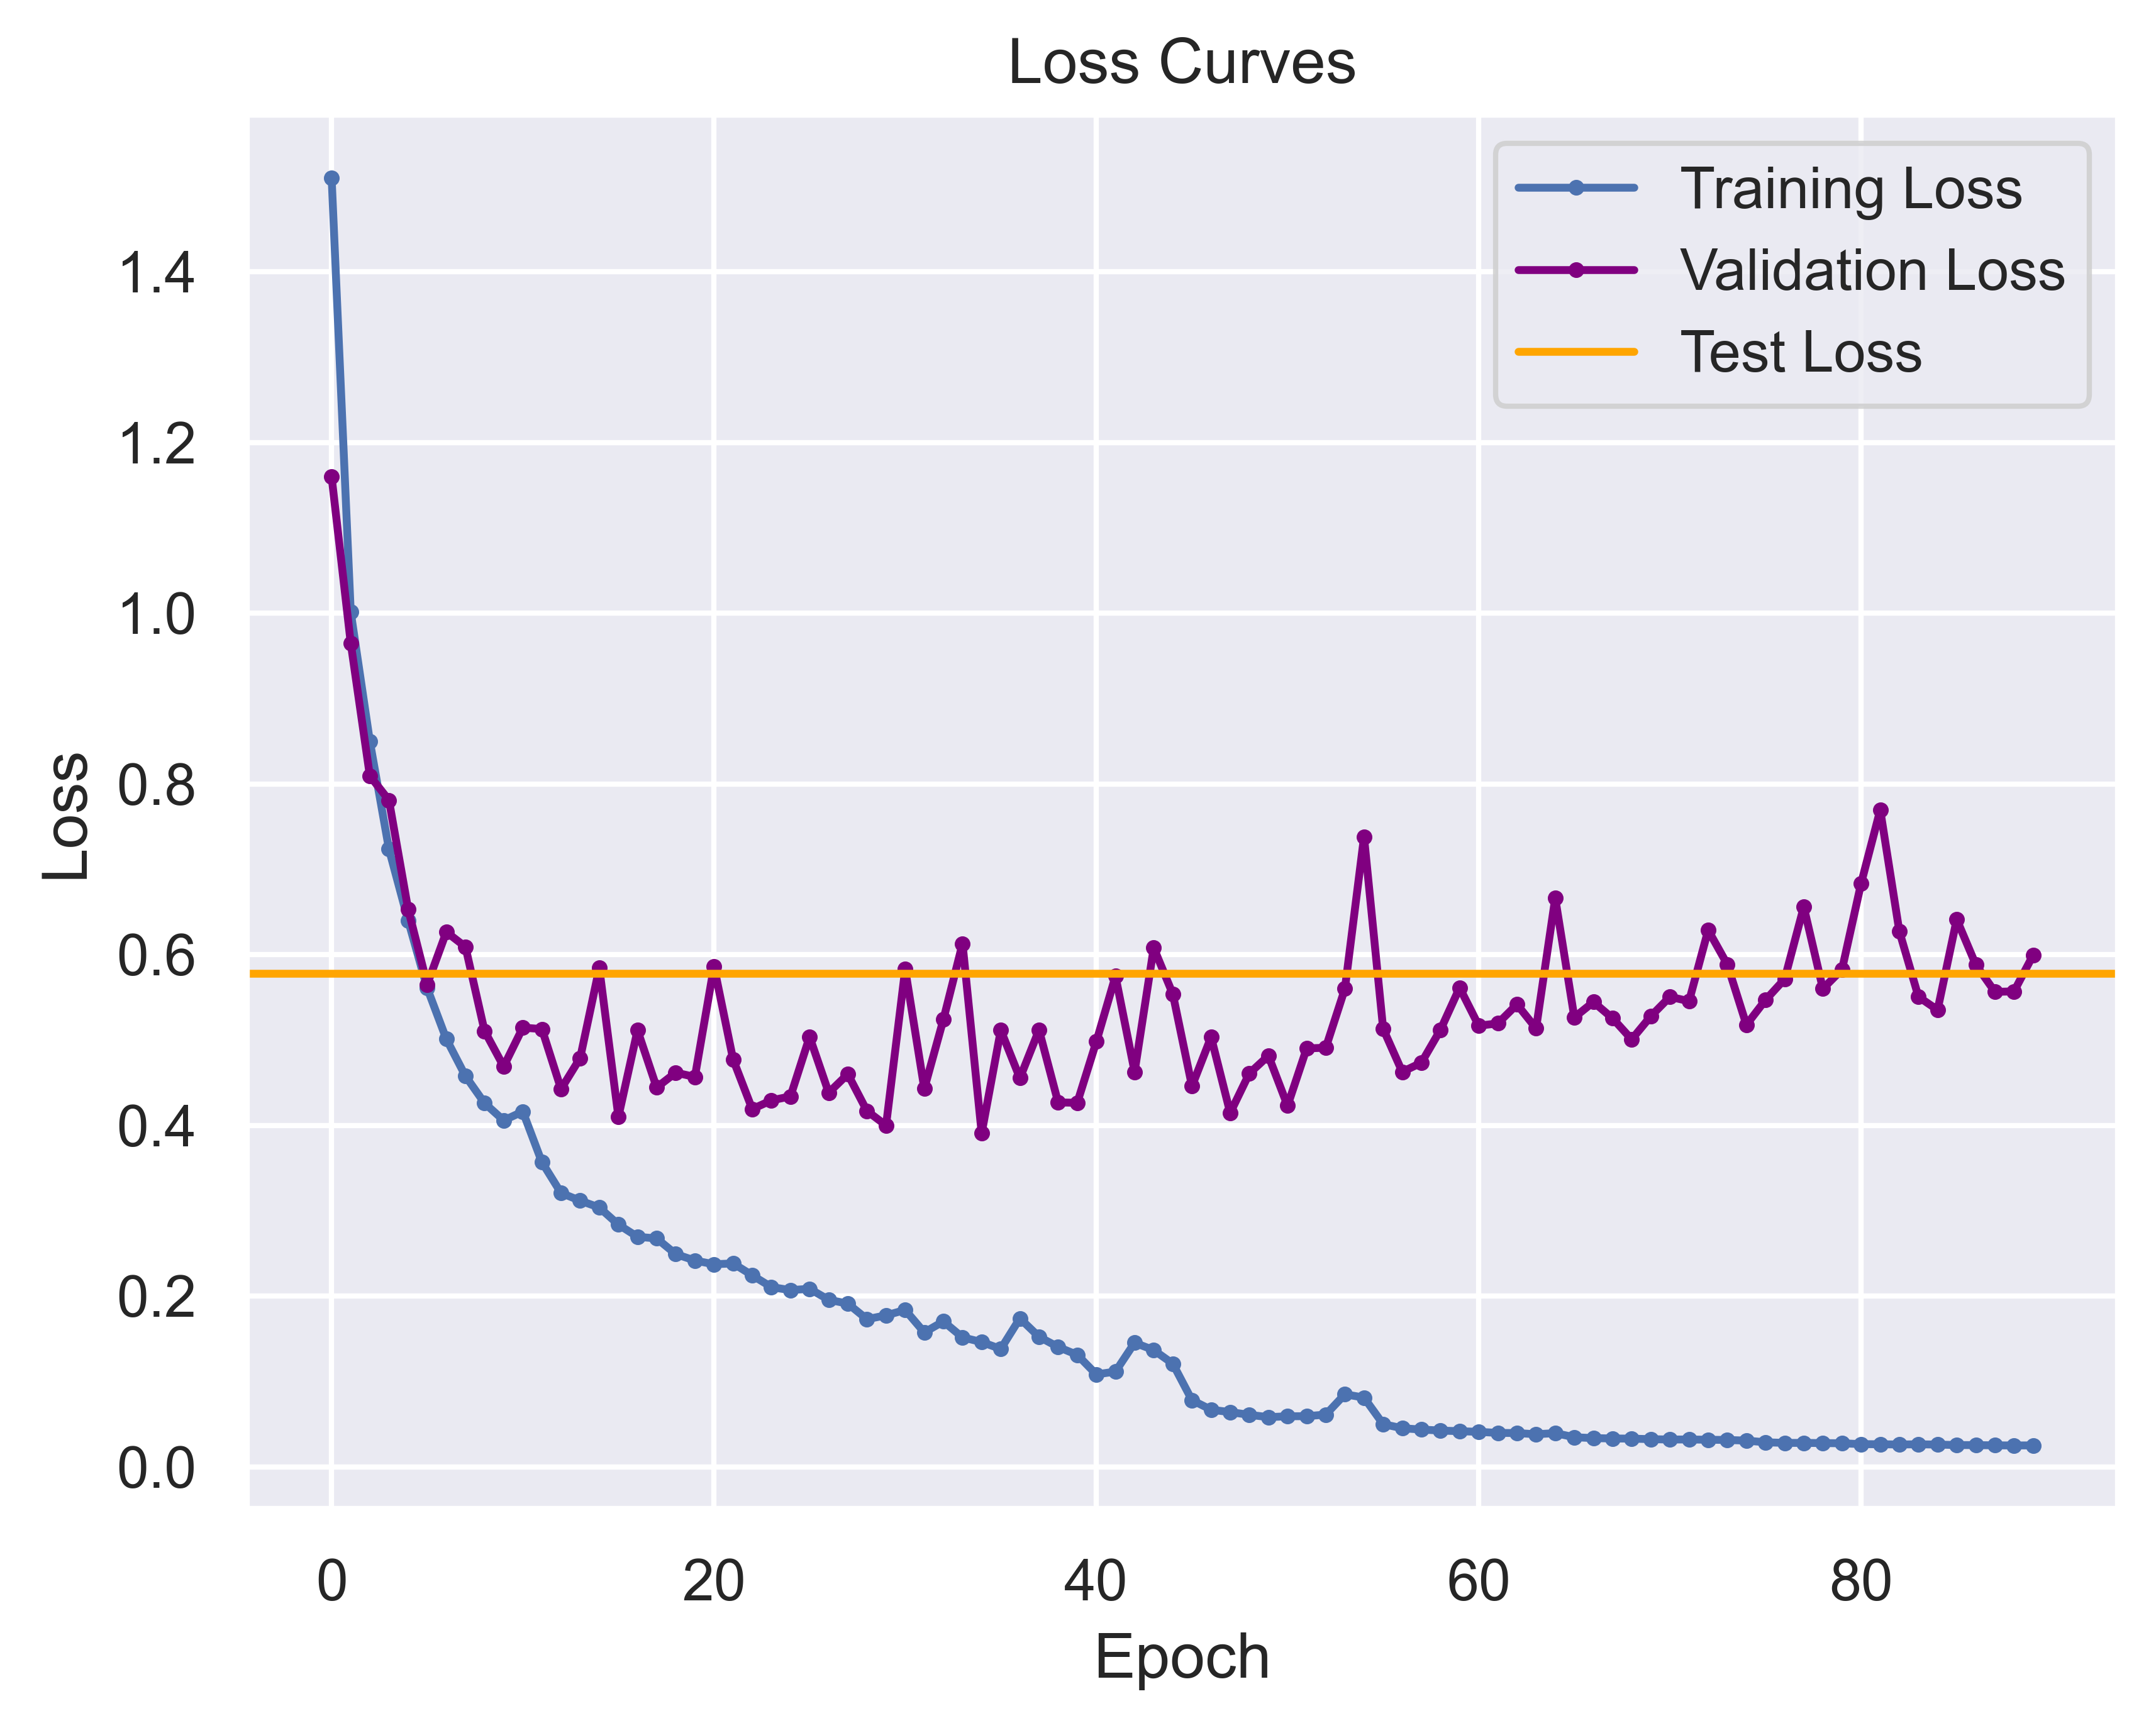

In [153]:

sn.set(font_scale=1)
cmap = matplotlib.colormaps['BuPu']
plt.rcParams['figure.dpi'] = 600
plt.plot(range(NR_OF_EPOCHS), training_loss, marker='.', markersize=4, linestyle='-', color='b', label='Training Loss')
plt.plot(range(NR_OF_EPOCHS), validation_loss, marker='.', markersize=4, linestyle='-', color='purple', label='Validation Loss')
plt.axhline(test_loss, color='orange', linestyle='-', label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss Curves")
plt.show()

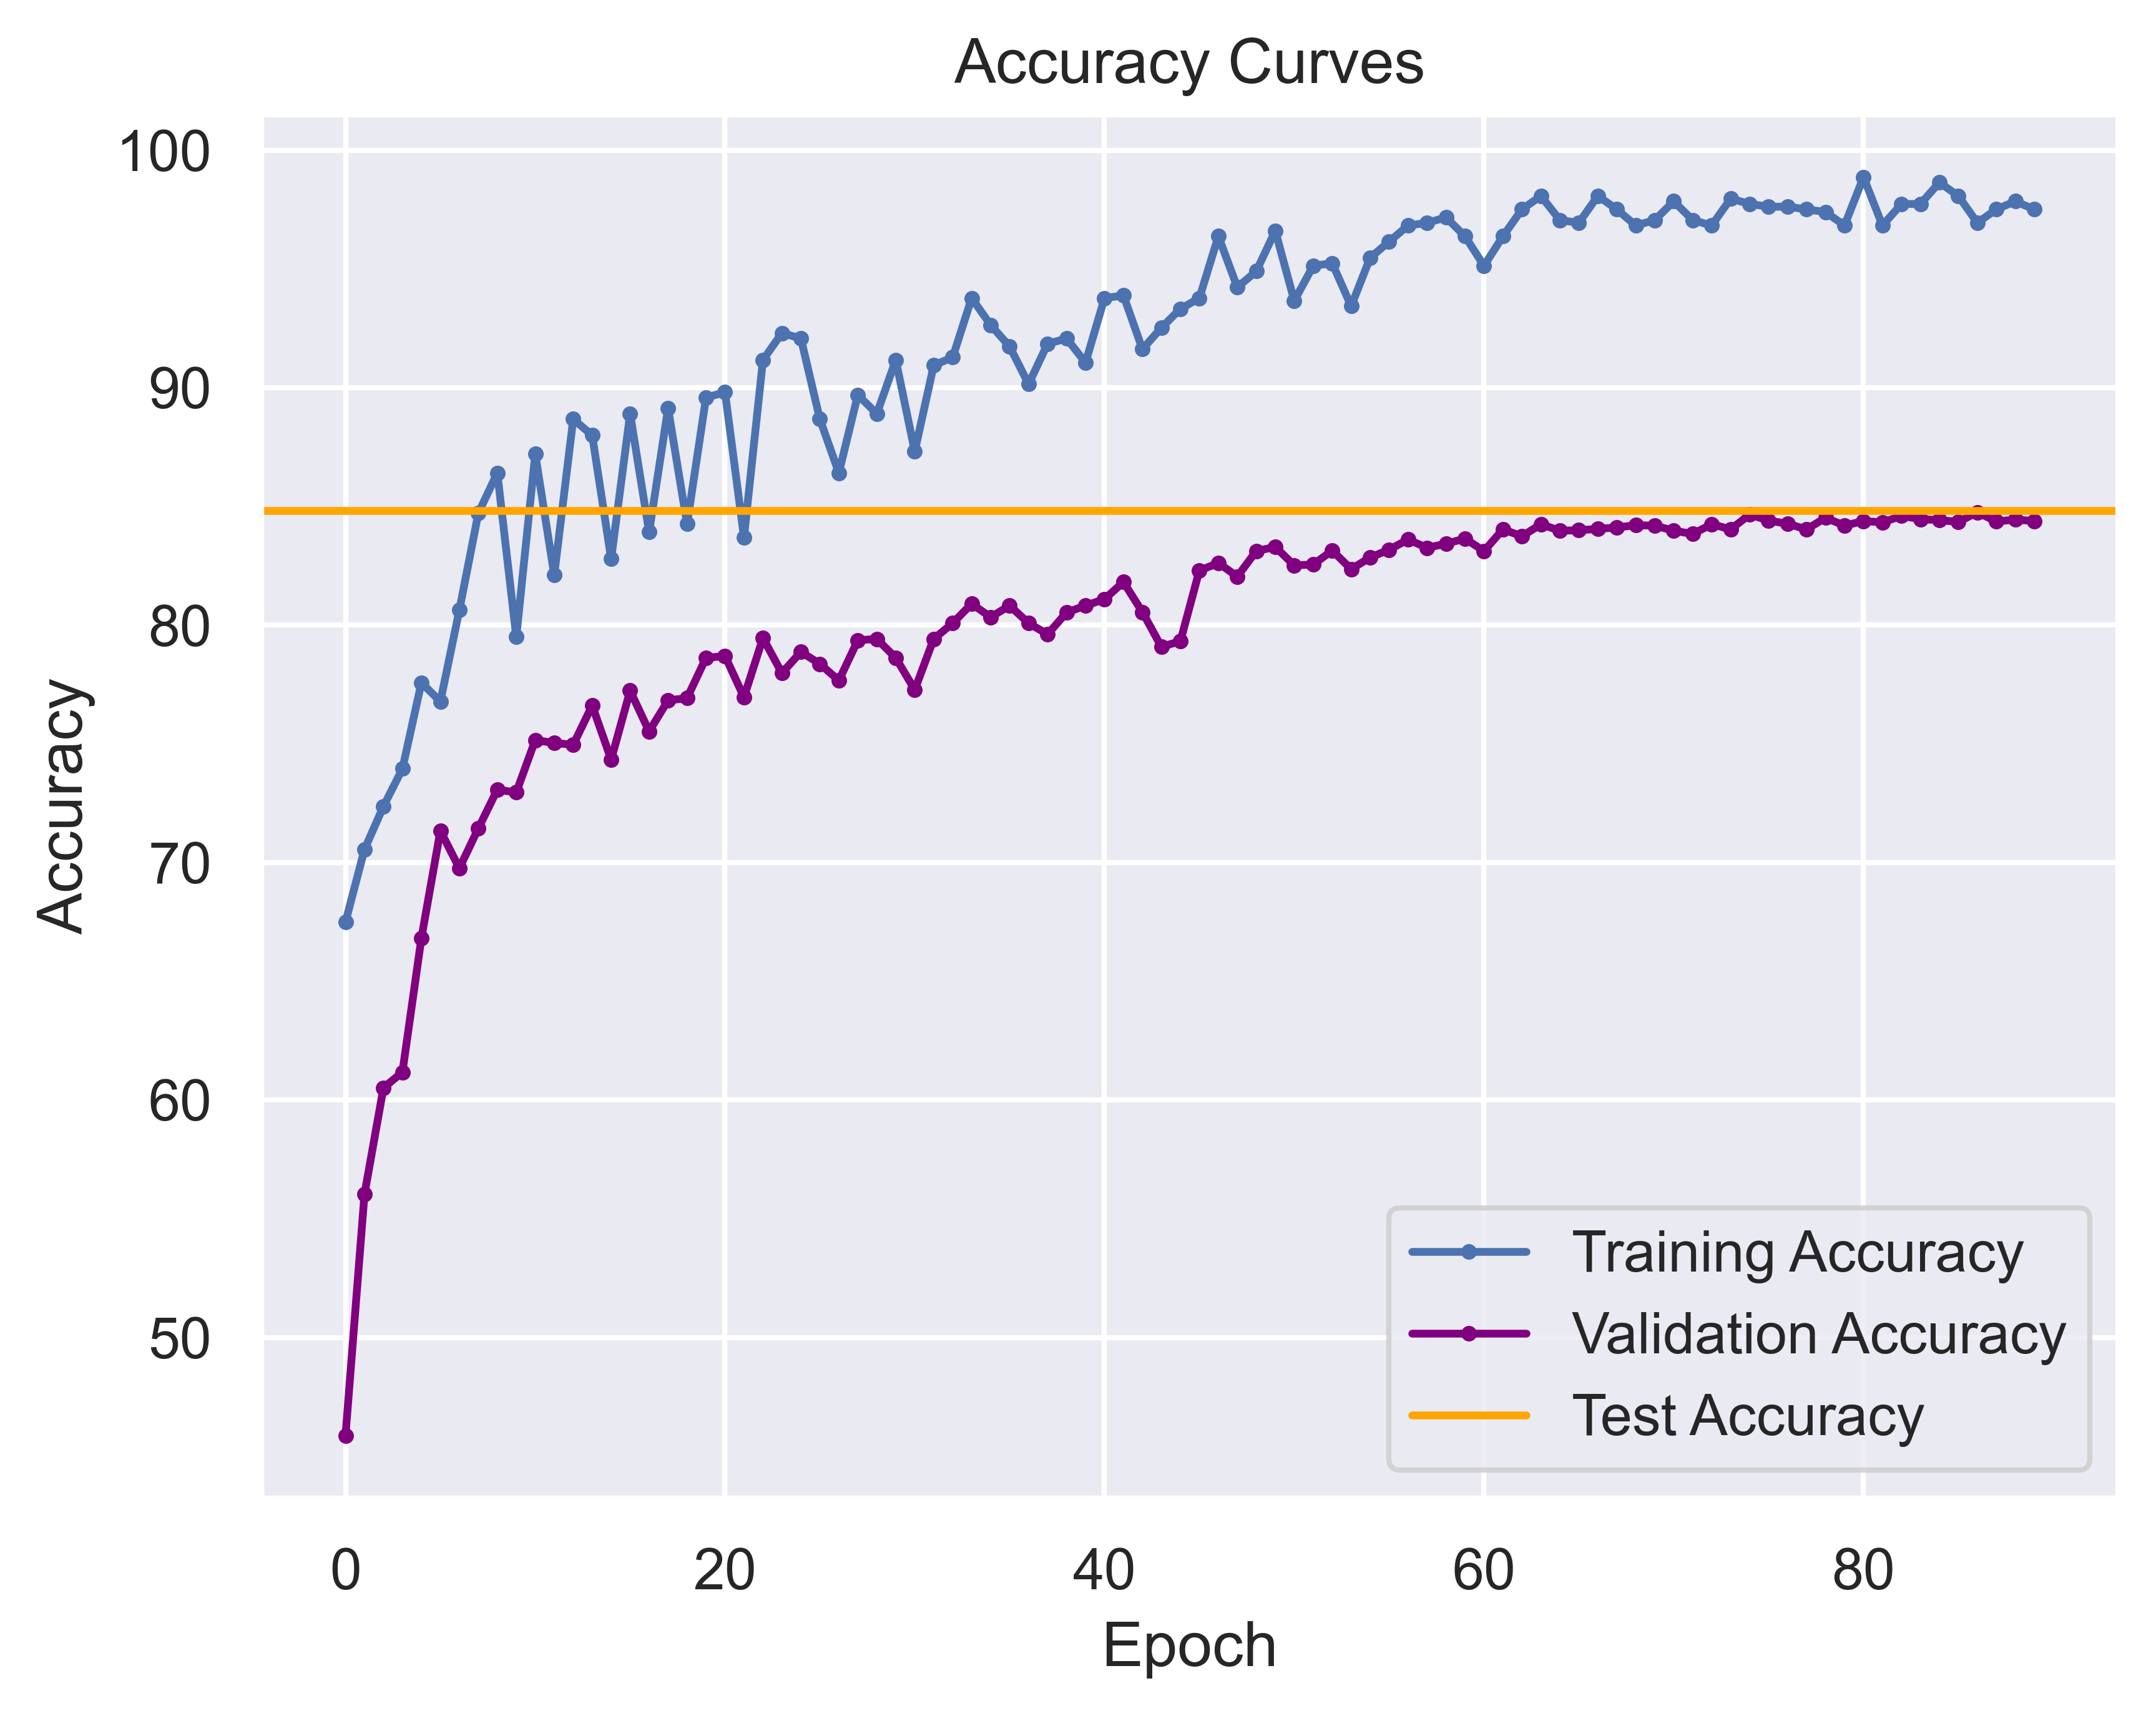

In [154]:

sn.set(font_scale=1)
cmap = matplotlib.colormaps['BuPu']
plt.rcParams['figure.dpi'] = 600
plt.plot(range(NR_OF_EPOCHS), training_accuracy, marker='.', markersize=4, linestyle='-', color='b', label='Training Accuracy')
plt.plot(range(NR_OF_EPOCHS), validation_accuracy, marker='.', markersize=4, linestyle='-', color='purple', label='Validation Accuracy')
plt.axhline(test_accuracy, color='orange', linestyle='-', label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy Curves")
plt.show()